In [1]:
# Import needed libraries
#import cugraph
#import cudf
import networkx as nx

In [7]:
# Construct Knodel graph from edgelist
edgelist_path='../data/knodel_edgelist.csv'

In [8]:
df = cudf.read_csv(edgelist_path, delimeter=',', dtype=['int32', 'int32'], header=None)
G = cugraph.Graph()
G = cugraph.from_edgelist(df, source='0', destination='1', edge_attr=None)

NameError: name 'cudf' is not defined

In [9]:
# Start basic experimentation

In [10]:
# Knodel graph should be bipartite
is_bip = G.is_bipartite()
print("Graph is bipartite: ", is_bip)

NameError: name 'G' is not defined

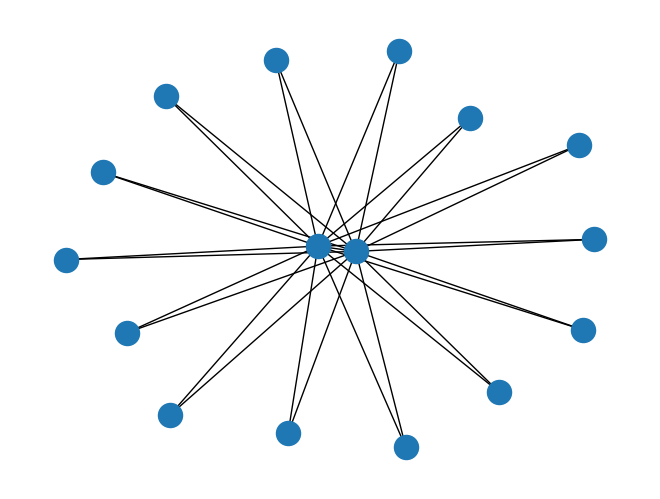

In [13]:
# Drag graph to check its structure
Gnx = nx.read_edgelist(edgelist_path)
nx.draw(Gnx)

In [14]:
nx.is_bipartite(Gnx)

False